# loading libraries

In [5]:
import pandas as pd
import numpy as np
import xgboost
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

# Reading the data

In [6]:
train =pd.read_csv("tcd-ml-1920-group-income-train.csv") #loading train data
test = pd.read_csv("tcd-ml-1920-group-income-test.csv")  #loading test data

c:\users\vishwesh singh\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\vishwesh singh\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train.head()

,Instance,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
0,1,1940.0,0,33,17,Unhappy,other,45,Afghanistan,25179,group head,No,1,Black,182,0 EUR,6182.05
1,2,1940.0,0,25,4.9,Unhappy,female,17,Afghanistan,2278204,heavy vehicle and mobile equipment service tec...,No,0,Blond,172,0 EUR,6819.69
2,3,1940.0,0,34,21,Unhappy,female,48,Afghanistan,822134,sorter,Bachelor,0,Blond,144,0 EUR,8663.53
3,4,1940.0,0,70,18,Average,female,42,Albania,59477,quality control senior engineer,No,1,Brown,152,0 EUR,2400.64
4,5,1940.0,0,51,8,Happy,other,15,Albania,23494,logistician,Master,1,Black,180,0 EUR,2816.18


In [8]:
test.head()

,Instance,Year of Record,Housing Situation,Crime Level in the City of Employement,Work Experience in Current Job [years],Satisfation with employer,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Yearly Income in addition to Salary (e.g. Rental Income),Total Yearly Income [EUR]
0,1,1994.0,Small House,23,12,Average,other,23,Serbia,734369,quality assurance specialist,Bachelor,0,Brown,151,0 EUR,NaN
1,2,1964.0,Castle,16,20,Average,NaN,44,Austria,897352,student data analyst,Master,0,Black,181,0 EUR,NaN
2,3,1974.0,Large House,22,11,Average,NaN,21,Serbia,766,project manager,Bachelor,0,Blond,179,0 EUR,NaN
3,4,1997.0,Large Apartment,41,14,Average,male,24,Sierra Leone,1150488,staff engineer / architect,Bachelor,0,Blond,201,0 EUR,NaN
4,5,1949.0,0,22,17,Happy,male,42,Ecuador,98532,machinist,No,1,Blond,163,0 EUR,NaN


In [9]:
frames = [train,test]
combine_data = pd.concat(frames, keys=['tr','te'])  #concatenating train and test data

In [10]:
combine_data_copy = combine_data #making a copy of data

In [11]:
combine_data_copy = combine_data_copy.drop("Instance", axis =True) #drop Instance
combine_data_copy = combine_data_copy.drop("Total Yearly Income [EUR]", axis =True) #drop Target variable

In [49]:
combine_data.head()

Instance  Year of Record Housing Situation  \
tr 0         1          1940.0                 0   
   1         2          1940.0                 0   
   2         3          1940.0                 0   
   3         4          1940.0                 0   
   4         5          1940.0                 0   

      Crime Level in the City of Employement  \
tr 0                                      33   
   1                                      25   
   2                                      34   
   3                                      70   
   4                                      51   

     Work Experience in Current Job [years] Satisfation with employer  Gender  \
tr 0                                     17                   Unhappy   other   
   1                                    4.9                   Unhappy  female   
   2                                     21                   Unhappy  female   
   3                                     18                   Average  female   
   4                                      8                     Happy   other   

      Age      Country  Size of City  \
tr 0   45  Afghanistan         25179   
   1   17  Afghanistan       2278204   
   2   48  Afghanistan        822134   
   3   42      Albania         59477   
   4   15      Albania         23494   

                                             Profession University Degree  \
tr 0                                         group head                No   
   1  heavy vehicle and mobile equipment service tec...                No   
   2                                             sorter          Bachelor   
   3                    quality control senior engineer                No   
   4                                        logistician            Master   

      Wears Glasses Hair Color  Body Height [cm]  \
tr 0              1      Black               182   
   1              0      Blond               172   
   2              0      Blond               144   
   3              1      Brown               152   
   4              1      Black               180   

     Yearly Income in addition to Salary (e.g. Rental Income)  \
tr 0                                              0 EUR         
   1                                              0 EUR         
   2                                              0 EUR         
   3                                              0 EUR         
   4                                              0 EUR         

      Total Yearly Income [EUR]  
tr 0                    6182.05  
   1                    6819.69  
   2                    8663.53  
   3                    2400.64  
   4                    2816.18

# Visualizing different features with Target Variables

In [13]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="ticks", color_codes=True)

In [14]:
#tips = combine_data.loc['tr']
#tips.fillna("NULL VALUE", inplace = True)
#ax = sns.catplot(x="Housing Situation", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =2)
#ax.set_xticklabels(rotation=90)

In [15]:
#tips = combine_data.loc['tr']
#tips.fillna("NULL VALUE", inplace = True)
#ax = sns.catplot(x="Year of Record", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [16]:
#tips = combine_data.loc['tr']
#tips = tips.sort_values(by="Crime Level in the City of Employement")
#ax = sns.catplot(x="Crime Level in the City of Employement", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [17]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Work Experience in Current Job [years]", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [18]:
#tips = combine_data.loc['tr']
#tips.fillna("NULL VALUE", inplace = True)
#ax = sns.catplot(x="Satisfation with employer", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [19]:
#tips = combine_data.loc['tr']
#tips.fillna("NULL VALUE", inplace = True)
#ax = sns.catplot(x="Gender", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [20]:
#tips = combine_data.loc['tr']
#tips = tips.sort_values(by="Age")
#ax = sns.catplot(x="Age", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [21]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Country", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =4)
#ax.set_xticklabels(rotation=90)

In [22]:
#tips = combine_data
#tips = tips.sort_values(by="Size of City")
#ax = sns.catplot(x="Size of City", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [23]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Profession", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =4)
#ax.set_xticklabels(rotation=90)

In [24]:
#tips = combine_data.loc['tr']
#tips.fillna("NULL VALUE", inplace = True)
#ax = sns.catplot(x="University Degree", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [25]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Wears Glasses", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [26]:
#tips = combine_data.loc['tr']
#tips.fillna('NULL VALUE', inplace = True)
#ax = sns.catplot(x="Hair Color", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [27]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Body Height [cm]", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

In [28]:
#tips = combine_data.loc['tr']
#ax = sns.catplot(x="Yearly Income in addition to Salary (e.g. Rental Income)", y="Total Yearly Income [EUR]", data=tips, jitter  = False, aspect =3)
#ax.set_xticklabels(rotation=90)

# Treating Null Values

In [29]:
print(combine_data_copy.loc['tr'].isnull().sum()) #checking null values for train data

Year of Record                                               4013
Housing Situation                                               0
Crime Level in the City of Employement                          0
Work Experience in Current Job [years]                          0
Satisfation with employer                                   38087
Gender                                                      74127
Age                                                             0
Country                                                         0
Size of City                                                    0
Profession                                                   2853
University Degree                                           80600
Wears Glasses                                                   0
Hair Color                                                  70211
Body Height [cm]                                                0
Yearly Income in addition to Salary (e.g. Rental Income)        0
dtype: int

In [34]:
print(combine_data_copy.loc['te'].isnull().sum()) #checking null values for the test data

Year of Record                                              0
Housing Situation                                           0
Crime Level in the City of Employement                      0
Work Experience in Current Job [years]                      0
Satisfation with employer                                   0
Gender                                                      0
Age                                                         0
Country                                                     0
Size of City                                                0
Profession                                                  0
University Degree                                           0
Wears Glasses                                               0
Hair Color                                                  0
Body Height [cm]                                            0
Yearly Income in addition to Salary (e.g. Rental Income)    0
dtype: int64


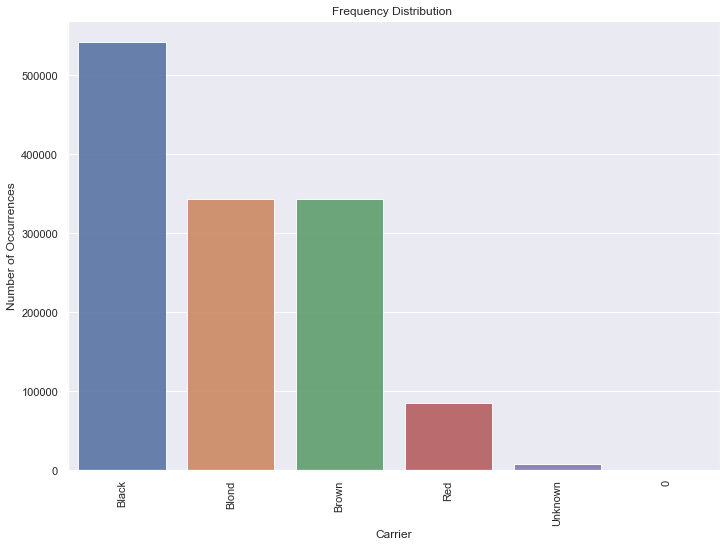

In [32]:
#plotting frequency for different features
import seaborn as sns    
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
carrier_count = combine_data_copy['Hair Color'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [33]:
#manually imputing the missing values as inferred from the visualization
combine_data_copy['Year of Record'].fillna('1977', inplace = True) 
combine_data_copy['Housing Situation'].replace('nA','0', inplace = True)
combine_data_copy['Housing Situation'].replace('0','Castle', inplace = True)
combine_data_copy['Housing Situation'].replace(0,'Castle', inplace = True)
combine_data_copy['Work Experience in Current Job [years]'].replace("#NUM!", '3.5', inplace = True)
combine_data_copy['Satisfation with employer'].fillna('Average', inplace = True)
combine_data_copy['Gender'].replace('0','f', inplace = True)
combine_data_copy['Gender'].fillna('Male', inplace = True)
combine_data_copy['Country'].fillna('Honduras', inplace = True)
combine_data_copy['Profession'].fillna('payment analyst', inplace = True)
combine_data_copy['University Degree'].fillna('Bachelor', inplace = True)
combine_data_copy['Hair Color'].replace('0','Unknown', inplace = True)
combine_data_copy['Hair Color'].fillna('Black', inplace = True)
combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].replace('EUR',"",regex = True, inplace =True)

In [37]:
combine_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1418012 entries, (tr, 0) to (te, 369437)
Data columns (total 15 columns):
Year of Record                                              1418012 non-null float64
Housing Situation                                           1418012 non-null category
Crime Level in the City of Employement                      1418012 non-null int64
Work Experience in Current Job [years]                      1418012 non-null float64
Satisfation with employer                                   1418012 non-null category
Gender                                                      1418012 non-null category
Age                                                         1418012 non-null int64
Country                                                     1418012 non-null category
Size of City                                                1418012 non-null int64
Profession                                                  1418012 non-null category
University Degree          

In [36]:
#Changing the data types of features
combine_data_copy['Year of Record'] = combine_data_copy['Year of Record'].astype(float)
combine_data_copy['Housing Situation'] = combine_data_copy['Housing Situation'].astype('category')
combine_data_copy['Work Experience in Current Job [years]'] = combine_data_copy['Work Experience in Current Job [years]'].astype(float)
combine_data_copy['Satisfation with employer'] = combine_data_copy['Satisfation with employer'].astype('category')
combine_data_copy['Gender'] = combine_data_copy['Gender'].astype('category')
combine_data_copy['Country'] = combine_data_copy['Country'].astype('category')
combine_data_copy['Profession'] = combine_data_copy['Profession'].astype('category')
combine_data_copy['University Degree'] = combine_data_copy['University Degree'].astype('category')
combine_data_copy['Hair Color'] = combine_data_copy['Hair Color'].astype('category')
combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'] = combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].astype('float')

In [38]:
combine_data_copy = combine_data_copy.drop("Crime Level in the City of Employement", axis =True) #dropping the crime feature

# Encoding the Categorical Variables with their frequency

In [39]:
encoding = combine_data_copy.groupby('Housing Situation').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Housing Situation"] = combine_data_copy["Housing Situation"].map(encoding)

In [40]:
encoding = combine_data_copy.groupby('Satisfation with employer').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Satisfation with employer"] = combine_data_copy["Satisfation with employer"].map(encoding)

In [41]:
encoding = combine_data_copy.groupby('Gender').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Gender"] = combine_data_copy["Gender"].map(encoding)

In [42]:
encoding = combine_data_copy.groupby('Country').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Country"] = combine_data_copy["Country"].map(encoding)

In [43]:
encoding = combine_data_copy.groupby('Profession').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Profession"] = combine_data_copy["Profession"].map(encoding)

In [44]:
encoding = combine_data_copy.groupby('University Degree').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["University Degree"] = combine_data_copy["University Degree"].map(encoding)

In [45]:
encoding = combine_data_copy.groupby('Hair Color').size()
encoding = encoding/len(combine_data_copy)
combine_data_copy["Hair Color"] = combine_data_copy["Hair Color"].map(encoding)

In [47]:
#changing the data type
combine_data_copy['Housing Situation'] = combine_data_copy['Housing Situation'].astype(float)
combine_data_copy['Satisfation with employer'] = combine_data_copy['Satisfation with employer'].astype(float)
combine_data_copy['Gender'] = combine_data_copy['Gender'].astype(float)
combine_data_copy['University Degree'] = combine_data_copy['University Degree'].astype(float)
combine_data_copy['Hair Color'] = combine_data_copy['Hair Color'].astype(float)

# Min Max Scaling 

In [ ]:
combine_data_copy['Year of Record']=(combine_data_copy['Year of Record']-combine_data_copy['Year of Record'].min())/(combine_data_copy['Year of Record'].max()-combine_data_copy['Year of Record'].min())
combine_data_copy['Work Experience in Current Job [years]']=(combine_data_copy['Work Experience in Current Job [years]']-combine_data_copy['Work Experience in Current Job [years]'].min())/(combine_data_copy['Work Experience in Current Job [years]'].max()-combine_data_copy['Work Experience in Current Job [years]'].min())
combine_data_copy['Age']=(combine_data_copy['Age']-combine_data_copy['Age'].min())/(combine_data_copy['Age'].max()-combine_data_copy['Age'].min())
combine_data_copy['Size of City']=(combine_data_copy['Size of City']-combine_data_copy['Size of City'].min())/(combine_data_copy['Size of City'].max()-combine_data_copy['Size of City'].min())
combine_data_copy['Body Height [cm]']=(combine_data_copy['Body Height [cm]']-combine_data_copy['Body Height [cm]'].min())/(combine_data_copy['Body Height [cm]'].max()-combine_data_copy['Body Height [cm]'].min())
combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)']=(combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)']-combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].min())/(combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].max()-combine_data_copy['Yearly Income in addition to Salary (e.g. Rental Income)'].min())
#combine_data_copy['Housing Situation']=(combine_data_copy['Housing Situation']-combine_data_copy['Housing Situation'].min())/(combine_data_copy['Housing Situation'].max()-combine_data_copy['Housing Situation'].min())
#combine_data_copy['Satisfation with employer']=(combine_data_copy['Satisfation with employer']-combine_data_copy['Satisfation with employer'].min())/(combine_data_copy['Satisfation with employer'].max()-combine_data_copy['Satisfation with employer'].min())
#combine_data_copy['Gender']=(combine_data_copy['Gender']-combine_data_copy['Gender'].min())/(combine_data_copy['Gender'].max()-combine_data_copy['Gender'].min())
#combine_data_copy['Profession']=(combine_data_copy['Profession']-combine_data_copy['Profession'].min())/(combine_data_copy['Profession'].max()-combine_data_copy['Profession'].min())
#combine_data_copy['Hair Color']=(combine_data_copy['Hair Color']-combine_data_copy['Hair Color'].min())/(combine_data_copy['Hair Color'].max()-combine_data_copy['Hair Color'].min())

# Model Training

In [54]:
x_prime=combine_data_copy.loc['tr'].ix[:,(0,1,2,3,4,5,6,7,8,9,10,11,12)].values
y_prime=combine_data.loc['tr'].ix[:,16].values

c:\users\vishwesh singh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\vishwesh singh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [67]:
#setting up the K-Fold Cross validation
fold = 15
kf = KFold(n_splits=fold)
target = (combine_data.loc['tr']['Total Yearly Income [EUR]']) 
features =  combine_data_copy.loc['tr']

# LGBM Model

In [62]:
#parameters for LGBM
params = {'boosting_type':'gbdt', 'num_leaves' :80, 
'max_depth': -1, 
'learning_rate':0.05, 
'n_estimators':1000, 
'max_bin':255, 
'subsample_for_bin':50000, 
'objective':None, 
'min_split_gain':0, 
'min_child_weight':3,
'min_child_samples':10, 
'subsample':1, 
'subsample_freq':1, 
'colsample_bytree':1, 
'reg_alpha':0.1, 
'reg_lambda':1, 'seed':17,'silent':False, 
'nthread':-1,
"bagging_seed": 11,
"metric": 'mae',
"verbosity": 1}

In [71]:
actual_test_lgbm = np.zeros(len(combine_data_copy.loc['te'])) #creating an empty numpy array for actual prediction scores

for fold,(train_index, test_index) in enumerate(kf.split(target)):
    print("Fold {}".format(fold+1))
    train_set = lgbm.Dataset(features.iloc[train_index], label=target.iloc[train_index])
    test_set = lgbm.Dataset(features.iloc[test_index], label=target.iloc[test_index])
    model = lgbm.train(params, train_set, valid_sets=test_set, verbose_eval=5000)
    actual_test_lgbm += model.predict(combine_data_copy.loc['te'])/n_splits  

Fold 1


KeyboardInterrupt: 

# XGB model

In [ ]:
#xgboost parameters
xgb_params = {
                'seed': 0,
                'colsample_bytree': 0.8,
                'silent': 1,
                'subsample': 0.6,
                'learning_rate': 0.05,
                # 'booster': 'gblinear',  # default is gbtree
                'objective': 'reg:linear',
                'max_depth': 6,
                'num_parallel_tree': 1,
                'min_child_weight': 1,
                'eval_metric': 'mae',
            }

In [ ]:
x_test_final=combine_data_copy.loc['te'].ix[:,(0,1,2,3,4,5,6,7,8,9,10,11,12,13)].values #taking final test data as numpy input for xgboost

In [ ]:
dtrain = xgb.DMatrix(x_prime, label=y_prime) 

In [ ]:
seed = 1
import xgboost as xgb
res = xgb.cv(xgb_params, dtrain, num_boost_round=2000, nfold=10, seed=seed, stratified=False,
                         early_stopping_rounds=10, verbose_eval=10, show_stdv=True)   #Doing the CV for xgboost

In [ ]:
best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]
print('CV SCORE: {0}+{1}'.format(cv_mean, cv_std))

In [ ]:
gbdt = xgb.train(xgb_params, dtrain, best_nrounds) #training the model

In [ ]:
dtest = xgb.DMatrix(x_test_final)

In [ ]:
output_xgb_cv = gbdt.predict(dtest) #predicting the final test data output for uploading

In [ ]:
#taking the average of the LGBM and XGB predictions
final_prediction = (0.5*(output_xgb_cv))+(0.5*(actual_test_lgbm))

In [ ]:
#Saving Submission file to CSV
np.savetxt("kaggle_submission.csv", np.dstack((np.arange(1, final_prediction.size+1),(final_prediction)))[0],"%d,%f",header="Instance,Total Yearly Income [EUR]")